In [84]:
#import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#t-sne
from __future__ import print_function
import time
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#UMAP
import umap

In [2]:
# load dataset into Pandas DataFrame
url = "http://users.wenglab.org/moorej3/Yu-Project/Mouse-Enhancer-Matrix.txt"
df = pd.read_csv(url, delimiter = '\s+')
df = df.transpose()

In [3]:
#Add column labels
df.columns = df.iloc[0]
df = df[1:]

In [4]:
#seperate tissue names and dates
rownames = pd.Series(df.index.to_list()).str.rsplit('_', 2, expand = True)
rownames.columns = ["sample","time","days"]
rownames = rownames.drop(["days"], axis = 1)
rownames = pd.DataFrame(rownames)
df.index =rownames.index
data = pd.concat([rownames,df], axis = 1)
data['sample'] = data["sample"].apply(str)
data.index = data['sample']
data = data.drop(["sample"], axis = 1)

In [5]:
#take log2 of values and add a pseudocount (I used 0.15)
data = data.apply(pd.to_numeric)
data.iloc[:,1:-1] = np.log2(data.iloc[:,1:-1])
data.iloc[:,1:-1] = data.iloc[:,1:-1] + 0.15

In [6]:
#replace remove enhancers with infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True, axis = 1)

In [7]:
#normalize data
data.iloc[:,1:-1] = pd.DataFrame(StandardScaler().fit_transform(data.iloc[:,1:-1]), columns = data.iloc[:,1:-1].columns)

In [8]:
#run PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data.iloc[:,1:-1])
pcaDf = data.iloc[:,0:3]
pcaDf.iloc[:,1:3] = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pcaDf
finalDf = finalDf.rename(columns={finalDf.columns[1]: 'principal component 1', finalDf.columns[2]: 'principal component 2'})

/Users/gabe/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/gabe/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


[0.23308787 0.12876301]


<Figure size 432x288 with 0 Axes>

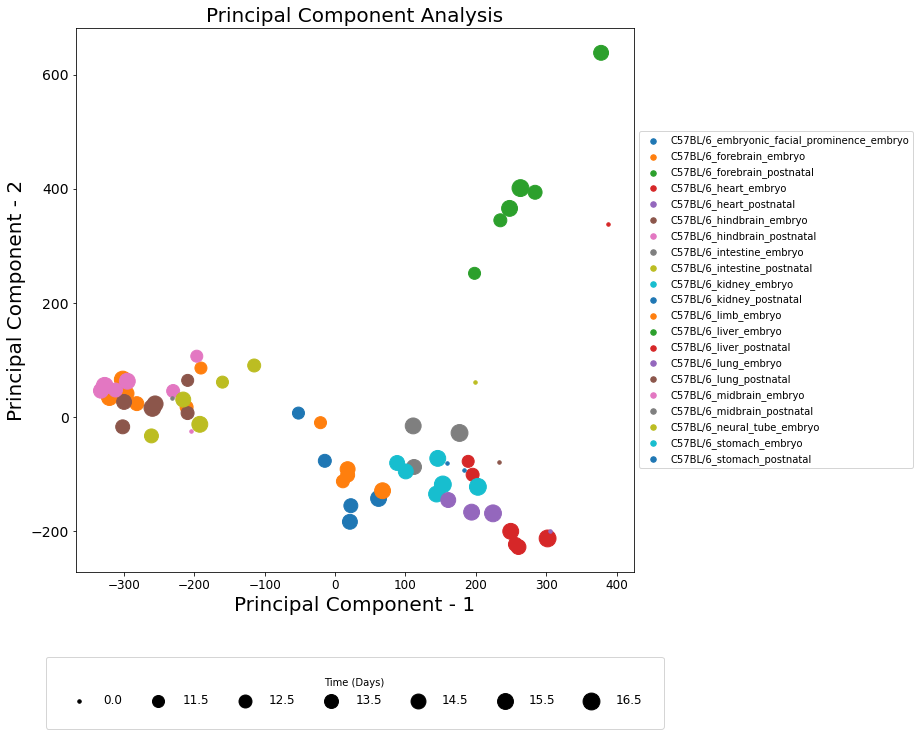

In [18]:
#plot PCA and print variances
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)

targets = set(finalDf.index)
colors = list(np.random.choice(range(256), size=len(finalDf.index)))
groups = finalDf.groupby(finalDf.index)

for name, group in groups:
    scatter = plt.scatter(group["principal component 1"], group["principal component 2"],  
             s = (group["time"] ** 2) + 12, label=name)

l1 = plt.scatter([],[], s=((0.0 ** 2) + 12), edgecolors='none')
l2 = plt.scatter([],[], s=((11.5 ** 2) + 12), edgecolors='none')
l3 = plt.scatter([],[], s=((12.5 ** 2) + 12), edgecolors='none')
l4 = plt.scatter([],[], s=((13.5 ** 2) + 12), edgecolors='none')
l5 = plt.scatter([],[], s=((14.5 ** 2) + 12), edgecolors='none')
l6 = plt.scatter([],[], s=((15.5 ** 2) + 12), edgecolors='none')
l7 = plt.scatter([],[], s=((16.5 ** 2) + 12), edgecolors='none')

labels = ["0.0", "11.5", "12.5", "13.5", "14.5", "15.5", "16.5"]

leg = plt.legend([l1, l2, l3, l4, l5, l6, l7], labels, ncol=7, frameon=True, fontsize=12,
handlelength=2, loc = 8, borderpad = 1.8,
handletextpad=1, title='Time (Days)', scatterpoints = 1, bbox_to_anchor=(0.5, -0.3))
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
leg.legendHandles[2].set_color('black')
leg.legendHandles[3].set_color('black')
leg.legendHandles[4].set_color('black')
leg.legendHandles[5].set_color('black')
leg.legendHandles[6].set_color('black')

lgnd1 = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for handle in lgnd1.legendHandles:
    handle.set_sizes([30.0])
    
plt.gca().add_artist(leg)
    
print(pca.explained_variance_ratio_)

In [80]:
#run t-sne
# I found that a perplexity/iteration pairing of 10/750 seemed to be 
# the best hyperparameter combination (25/5000 was also good)
time_start = time.time()
tsne = TSNE(n_components=2, perplexity=10, n_iter = 750)
tsne_results = tsne.fit_transform(data.iloc[:,1:-1])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 0.9931371212005615 seconds


In [81]:
#format t-sne graph data
tsneDf = data.iloc[:,0:3]
tsneDf.iloc[:,1:3] = pd.DataFrame(data = tsne_results
             , columns = ['t-sne 2d one', 't-sne 2d two'])
tsneDf = tsneDf.rename(columns={tsneDf.columns[1]: 't-sne 2d one'
                                 , tsneDf.columns[2]: 't-sne 2d two'})

/Users/gabe/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/gabe/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<Figure size 432x288 with 0 Axes>

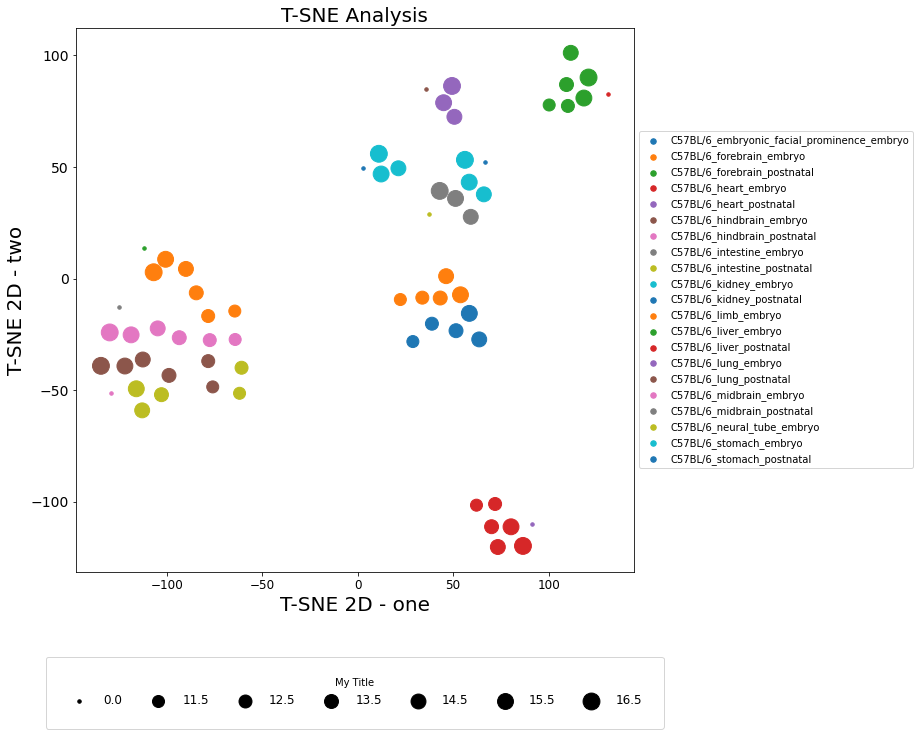

In [83]:
#plot t-sne
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('T-SNE 2D - one',fontsize=20)
plt.ylabel('T-SNE 2D - two',fontsize=20)
plt.title("T-SNE Analysis",fontsize=20)

targets = set(tsneDf.index)
colors = list(np.random.choice(range(256), size=len(tsneDf.index)))
groups = tsneDf.groupby(tsneDf.index)

for name, group in groups:
    scatter = plt.scatter(group["t-sne 2d one"], group["t-sne 2d two"],  
             s = (group["time"] ** 2) + 12, label=name)

l1 = plt.scatter([],[], s=((0.0 ** 2) + 12), edgecolors='none')
l2 = plt.scatter([],[], s=((11.5 ** 2) + 12), edgecolors='none')
l3 = plt.scatter([],[], s=((12.5 ** 2) + 12), edgecolors='none')
l4 = plt.scatter([],[], s=((13.5 ** 2) + 12), edgecolors='none')
l5 = plt.scatter([],[], s=((14.5 ** 2) + 12), edgecolors='none')
l6 = plt.scatter([],[], s=((15.5 ** 2) + 12), edgecolors='none')
l7 = plt.scatter([],[], s=((16.5 ** 2) + 12), edgecolors='none')

labels = ["0.0", "11.5", "12.5", "13.5", "14.5", "15.5", "16.5"]

leg = plt.legend([l1, l2, l3, l4, l5, l6, l7], labels, ncol=7, frameon=True, fontsize=12,
handlelength=2, loc = 8, borderpad = 1.8,
handletextpad=1, title='My Title', scatterpoints = 1, bbox_to_anchor=(0.5, -0.3))
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
leg.legendHandles[2].set_color('black')
leg.legendHandles[3].set_color('black')
leg.legendHandles[4].set_color('black')
leg.legendHandles[5].set_color('black')
leg.legendHandles[6].set_color('black')

lgnd1 = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for handle in lgnd1.legendHandles:
    handle.set_sizes([30.0])
    
plt.gca().add_artist(leg)

In [141]:
#run UMAP
#the hyperparameters for neighbors and min_dist when the metric is set as correlation worked
#best at 20/0.2
embedding = umap.UMAP(n_neighbors=20,
                      min_dist=0.2,
                      metric='correlation').fit_transform(data.iloc[:,1:-1])
umapDf = data.iloc[:,0:3]
umapDf.iloc[:,1:3] = pd.DataFrame(data = embedding
             , columns = ['UMAP one', 'UMAP two'])
umapDf = umapDf.rename(columns={umapDf.columns[1]: 'UMAP one'
                                 , umapDf.columns[2]: 'UMAP two'})

/Users/gabe/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/gabe/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<Figure size 432x288 with 0 Axes>

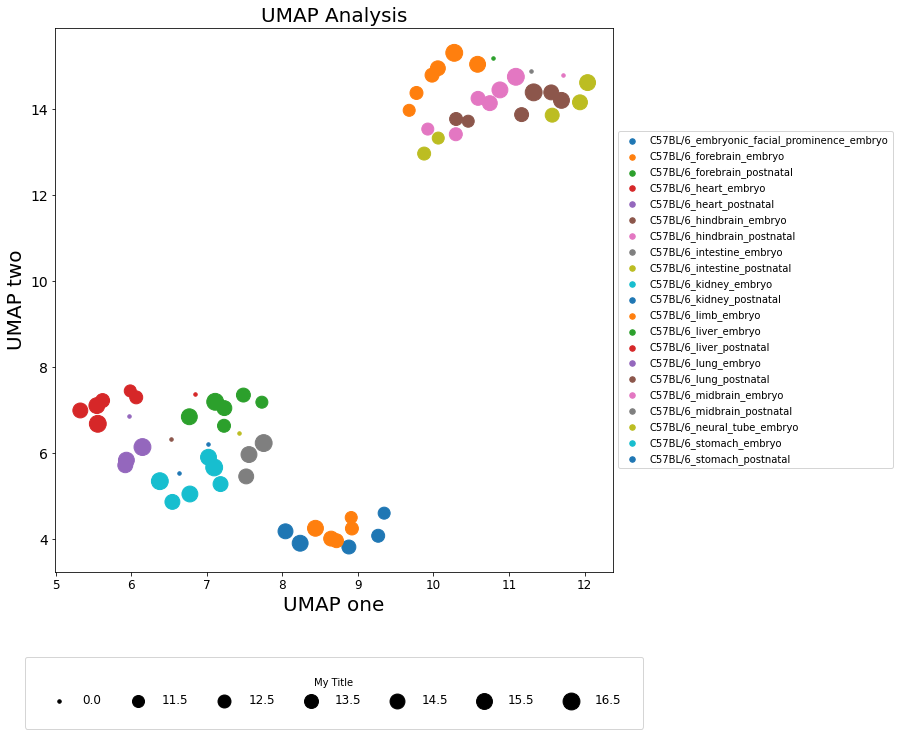

In [142]:
#plot UMAP
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('UMAP one',fontsize=20)
plt.ylabel('UMAP two',fontsize=20)
plt.title("UMAP Analysis",fontsize=20)

targets = set(umapDf.index)
colors = list(np.random.choice(range(256), size=len(umapDf.index)))
groups = umapDf.groupby(umapDf.index)

for name, group in groups:
    scatter = plt.scatter(group["UMAP one"], group["UMAP two"],  
             s = (group["time"] ** 2) + 12, label=name)

l1 = plt.scatter([],[], s=((0.0 ** 2) + 12), edgecolors='none')
l2 = plt.scatter([],[], s=((11.5 ** 2) + 12), edgecolors='none')
l3 = plt.scatter([],[], s=((12.5 ** 2) + 12), edgecolors='none')
l4 = plt.scatter([],[], s=((13.5 ** 2) + 12), edgecolors='none')
l5 = plt.scatter([],[], s=((14.5 ** 2) + 12), edgecolors='none')
l6 = plt.scatter([],[], s=((15.5 ** 2) + 12), edgecolors='none')
l7 = plt.scatter([],[], s=((16.5 ** 2) + 12), edgecolors='none')

labels = ["0.0", "11.5", "12.5", "13.5", "14.5", "15.5", "16.5"]

leg = plt.legend([l1, l2, l3, l4, l5, l6, l7], labels, ncol=7, frameon=True, fontsize=12,
handlelength=2, loc = 8, borderpad = 1.8,
handletextpad=1, title='My Title', scatterpoints = 1, bbox_to_anchor=(0.5, -0.3))
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
leg.legendHandles[2].set_color('black')
leg.legendHandles[3].set_color('black')
leg.legendHandles[4].set_color('black')
leg.legendHandles[5].set_color('black')
leg.legendHandles[6].set_color('black')

lgnd1 = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for handle in lgnd1.legendHandles:
    handle.set_sizes([30.0])
    
plt.gca().add_artist(leg)